# Multiple Linear Regression

In [1]:
# Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## Data Sourcing

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# For simplicity, we will do linear regression with less data
X = X[["MedInc", "HouseAge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=True)

print(pd.concat([X_train, y_train], axis=1).head())

       MedInc  HouseAge  MedHouseVal
19061  3.5507      24.0        2.579
14473  8.0510      19.0        3.636
19878  3.5296       7.0        0.837
5864   3.2400      45.0        2.269
12703  2.5245      17.0        0.991


## Linear Regression And Linear Algebra

In [3]:
# Transpose of X
X_np = X_train.to_numpy()
X_np = np.hstack([np.ones((len(X_np), 1)), X_np])
XT_np = np.matrix.transpose(X_np)

# Multiplication of XT and X
XT_X_np = np.linalg.matmul(XT_np, X_np)

# Inverse of multiplication of XT and X
XT_X_inv_np = np.linalg.inv(XT_X_np)

# Multiplication of XT and y
y_np = y_train.to_numpy()
XT_y_np = np.matmul(XT_np, y_np)

# B
B_np = np.matmul(XT_X_inv_np, XT_y_np)

# print(f"XT: {XT_np}")
# print(f"XT_X: {XT_X_np}")
# print(f"XT_X_inv: {XT_X_inv_np}")
# print(f"XT: {XT_np}")
# print(f"B: {B_np}")

## $TSS$, $RSS$, $MSE$, and $R^2$

In [4]:
def predict(X):
    return B_np[0] + B_np[1]*X.iloc[0] + B_np[2]*X.iloc[1]

y_pred = X_test.apply(predict, axis=1)
# print(y_pred)

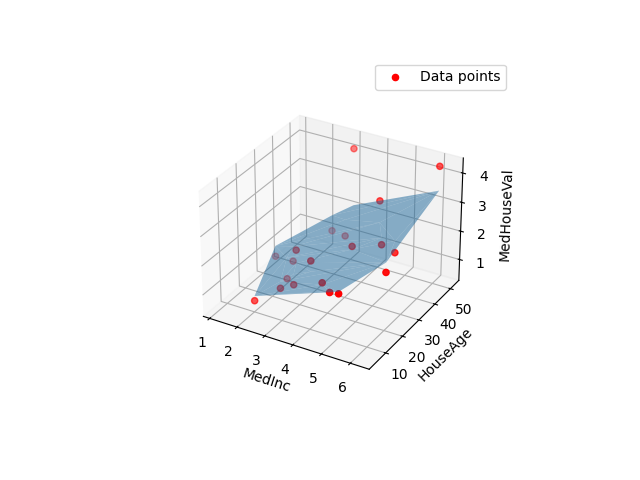

In [5]:
%matplotlib widget

ax = plt.figure().add_subplot(projection='3d')

# Scatter
ax.scatter(X_test["MedInc"], X_test["HouseAge"], zs=y_test, c='r', label='Data points')

# Plane
ax.plot_trisurf(X_test["MedInc"], X_test["HouseAge"], y_pred, alpha=0.5)

ax.legend()
ax.set_xlabel('MedInc')
ax.set_ylabel('HouseAge')
ax.set_zlabel('MedHouseVal')

# Adjust view to fit the screen
ax.set_box_aspect(None, zoom=0.8)

plt.show()

In [6]:
# TSS
tss = 0
for v in y_test:
    tss = tss + (v - y_test.mean())**2

# RSS
rss = 0
for (_, v_test), (_, v_pred) in zip(y_test.items(), y_pred.items()):
    rss = rss + (v_test - v_pred)**2

# R^2
r_squared = 1 - (rss/tss)

# MSE
mse = rss / len(y_test)

print(f"TSS: {tss}")
print(f"RSS: {rss}")
print(f"R^2: {r_squared}")
print(f"R^2 (sklearn.metrics): {r2_score(y_test, y_pred)}")
print(f"MSE: {mse}")
print(f"MSE (sklearn.metrics): {mean_squared_error(y_test, y_pred)}")

TSS: 21.623823800000007
RSS: 7.617100103363872
R^2: 0.6477449976556011
R^2 (sklearn.metrics): 0.6477449976556011
MSE: 0.3808550051681936
MSE (sklearn.metrics): 0.3808550051681935


## Comparing with scikit-learn's LinearRegression()

In [7]:
regressor = LinearRegression().fit(X_train, y_train)

y_pred_sklearn = regressor.predict(X_test)

print(f"R^2 (sklearn.linear_model.LinearRegression): {r2_score(y_test, y_pred_sklearn)}")
print(f"MSE (sklearn.linear_model.LinearRegression): {mean_squared_error(y_test, y_pred_sklearn)}")

R^2 (sklearn.linear_model.LinearRegression): 0.6477449976556022
MSE (sklearn.linear_model.LinearRegression): 0.3808550051681923
